## Bateman-Burger's Equation in 2D
### Advection-Diffusion Equation
$$ \frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} + v \frac{\partial u}{\partial y}  = \nu \left(\frac{\partial^{2} u}{\partial x^{2}} + \frac{\partial^{2} u}{\partial y^{2}} \right)$$

$$ \frac{\partial v}{\partial t} + u \frac{\partial v}{\partial x} + v \frac{\partial v}{\partial y}  = \nu \left(\frac{\partial^{2} v}{\partial x^{2}} + \frac{\partial^{2} v}{\partial y^{2}} \right)$$

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D ##library for 3d projection plots
%matplotlib inline

### Declaring variables

In [74]:
###variable declarations
nx = 41
ny = 41
nt = 120
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = .0009
nu = 0.01
dt = sigma * dx * dy / nu


x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)

u = np.ones((ny, nx))  # create a 1xn vector of 1's
v = np.ones((ny, nx))
un = np.ones((ny, nx)) 
vn = np.ones((ny, nx))
comb = np.ones((ny, nx))

###Assign initial conditions

##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2 
##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
v[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2

### Plotting Initial Conditions

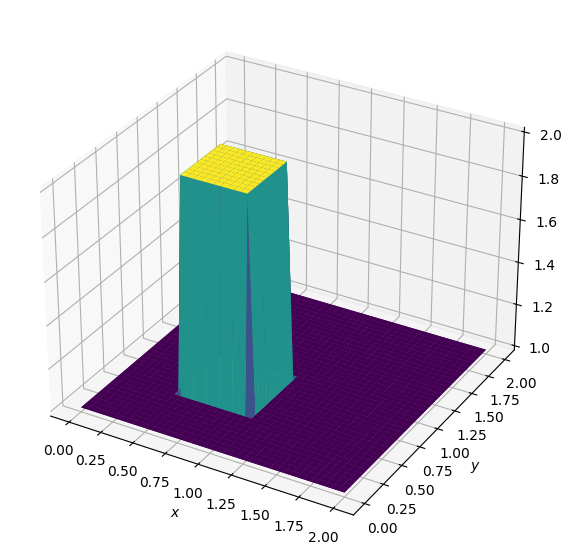

In [75]:
###(plot ICs)
fig = plt.figure(figsize=(11, 7), dpi=100)
ax = fig.add_subplot(projection='3d')
X, Y = np.meshgrid(x, y)
ax.plot_surface(X, Y, u[:], cmap=plt.cm.viridis, rstride=1, cstride=1)
ax.plot_surface(X, Y, v[:], cmap=plt.cm.viridis, rstride=1, cstride=1)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$');

### Function that plots the Bateman-Burger's equation

In [76]:
def advecdif(nt):
    ##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
    u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2 
    ##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
    v[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2 
        
    for n in range(nt + 1): ##loop across number of time steps
        un = u.copy()
        vn = v.copy()

        u[1:-1, 1:-1] = (un[1:-1, 1:-1] -
                        dt / dx * un[1:-1, 1:-1] * 
                        (un[1:-1, 1:-1] - un[1:-1, 0:-2]) - 
                        dt / dy * vn[1:-1, 1:-1] * 
                        (un[1:-1, 1:-1] - un[0:-2, 1:-1]) + 
                        nu * dt / dx**2 * 
                        (un[1:-1,2:] - 2 * un[1:-1, 1:-1] + un[1:-1, 0:-2]) + 
                        nu * dt / dy**2 * 
                        (un[2:, 1:-1] - 2 * un[1:-1, 1:-1] + un[0:-2, 1:-1]))
        
        v[1:-1, 1:-1] = (vn[1:-1, 1:-1] - 
                        dt / dx * un[1:-1, 1:-1] *
                        (vn[1:-1, 1:-1] - vn[1:-1, 0:-2]) -
                        dt / dy * vn[1:-1, 1:-1] * 
                        (vn[1:-1, 1:-1] - vn[0:-2, 1:-1]) + 
                        nu * dt / dx**2 * 
                        (vn[1:-1, 2:] - 2 * vn[1:-1, 1:-1] + vn[1:-1, 0:-2]) +
                        nu * dt / dy**2 *
                        (vn[2:, 1:-1] - 2 * vn[1:-1, 1:-1] + vn[0:-2, 1:-1]))
        
        u[0,  :] = 1
        u[-1, :] = 1
        u[:,  0] = 1
        u[:, -1] = 1
        
        v[0,  :] = 1
        v[-1, :] = 1
        v[:,  0] = 1
        v[:, -1] = 1

    fig = plt.figure(figsize=(11, 7), dpi=100)
    ax = fig.add_subplot(projection='3d')
    X, Y = np.meshgrid(x, y)
    ax.plot_surface(X, Y, u, cmap=plt.cm.viridis, rstride=1, cstride=1)
    ax.plot_surface(X, Y, v, cmap=plt.cm.viridis, rstride=1, cstride=1)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$');

### Example

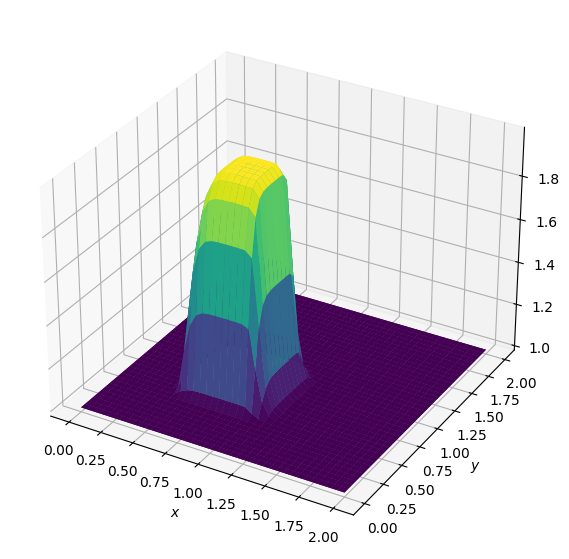

In [77]:
advecdif(120)